Búsqueda de los vecinos más cercanos  ---
===

* 0:00 min | Ultima modificación: Septiembre 25, 2021 | [YouTube]

Las metodologías basadas en vecinos más cercanos, requieeren de la computación eficiente de las distancias entre puntos.

Nearest Neighbors
---

In [1]:
#
# Matriz de datos para todos los ejemplos
#
import numpy as np

X = np.array(
    [
        [-1, -1],
        [-2, -1],
        [-3, -2],
        [1, 1],
        [2, 1],
        [3, 2],
    ]
)

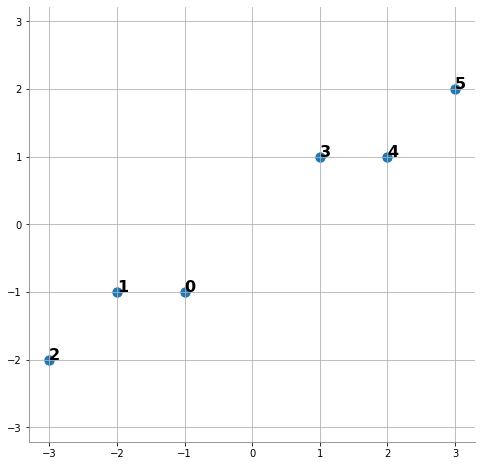

In [2]:
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors

plt.figure(figsize=(8, 8))
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.scatter(
    X[:, 0],
    X[:, 1],
    marker="o",
    s=130,
    edgecolors="white",
    c="tab:blue",
)

for i in range(X.shape[0]):

    plt.text(
        X[i, 0],
        X[i, 1],
        str(i),
        color="k",
        fontdict={"weight": "bold", "size": 16},
    )


plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid()
plt.axis("equal")
plt.show()

In [3]:
nearestNeighbors = NearestNeighbors(
    # -----------------------------------------------------
    # Number of neighbors to use by default for kneighbors
    # queries
    n_neighbors=3,
    # -----------------------------------------------------
    # Range of parameter space to use by default for
    # radius_neighbors queries.
    radius=1.0,
    # -----------------------------------------------------
    # Algorithm used to compute the nearest neighbors:
    # 'ball_tree', 'kd_tree', 'brute', 'auto'
    algorithm="ball_tree",
    # -----------------------------------------------------
    # The distance metric to use for the tree.
    metric="minkowski",
).fit(X)


#
# Encuentra los k-vecinos de un punto
#
distances, indices = nearestNeighbors.kneighbors(X)
indices

array([[0, 1, 2],
       [1, 0, 2],
       [2, 1, 0],
       [3, 4, 5],
       [4, 3, 5],
       [5, 4, 3]])

In [4]:
distances

array([[0.        , 1.        , 2.23606798],
       [0.        , 1.        , 1.41421356],
       [0.        , 1.41421356, 2.23606798],
       [0.        , 1.        , 2.23606798],
       [0.        , 1.        , 1.41421356],
       [0.        , 1.41421356, 2.23606798]])

In [5]:
#
# Matriz indicando las conexiones entre puntos
#
nearestNeighbors.kneighbors_graph(X).toarray()

array([[1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.]])

Algoritmo Ball Tree
---

Este algoritmo se basa en el particionamiento del espacio de entrada en esferas anidadas conocidas como "balls". Este modelo es interpretado como un arbol binario donde cada nodo define una esfera D-dimensional, la cual contiene un subconjunto de datos.

* Cada nodo interno del arbol parte el subconjunto de datos en dos esferas independientes. 

* Aunque las esferas pueden intersectarse, cada punto es asignado a una y solo una esfera.

* Siguiendo los principios del particioamiento recursivo, cada nodo define una esfera que contiene todos los nodos que pertenecen a dicho subarbol.

* En el caso del algoritmo de Nearest Neighbors, el algoritmo BallTree genera esferas que contienen todos los puntos cercanos.



![balltree.png](assets/balltree.png)

In [6]:
import numpy as np
from sklearn.neighbors import BallTree

ballTree = BallTree(X, leaf_size=2)

dist, ind = ballTree.query(
    # -----------------------------------------------------
    # array([[0.09762701, 0.05256891]])
    X=X[:1],
    # -----------------------------------------------------
    # The number of nearest neighbors to return
    k=3,
    # -----------------------------------------------------
    # f True, return a tuple (d, i) of distances and
    # indices if False, return array i
    return_distance=True,
    # -----------------------------------------------------
    # if True, then distances and indices of each point are
    # sorted
    sort_results=True,
)

display(
    ind,
    dist,
)

array([[0, 1, 2]])

array([[0.        , 1.        , 2.23606798]])

In [7]:
#
# Query the tree for neighbors within a radius r
#
ballTree.query_radius(
    # -----------------------------------------------------
    # An array of points to query
    X[:1],
    # -----------------------------------------------------
    # distance within which neighbors are returned
    r=1.0,
    # -----------------------------------------------------
    # if True, return only the count of points within
    # distance r
    count_only=True,
    # -----------------------------------------------------
    # if True, the distances and indices will be sorted
    # before being returned
    sort_results=False,
)

array([2])

In [8]:
#
# Compute a gaussian kernel density estimate
#
ballTree.kernel_density(
    # -----------------------------------------------------
    # An array of points to query
    X=X[:3],
    # -----------------------------------------------------
    # the bandwidth of the kernel
    h=0.1,
    # -----------------------------------------------------
    # 'gaussian', 'tophat', 'epanechnikov', 'exponential',
    # 'linear', 'cosine'
    kernel="gaussian",
)

array([15.91549431, 15.91549431, 15.91549431])

Algoritmo KDTree
---

Hace una partición similar al algoritmo BallTree pero parte el espacio con planos.

Su operación es similar a la del algoritmo anterior.

In [9]:
from sklearn.neighbors import KDTree

kdTree = KDTree(X, leaf_size=2)

dist, ind = kdTree.query(X[:1], k=3)

display(
    ind,
    dist,
)

array([[0, 1, 2]])

array([[0.        , 1.        , 2.23606798]])

---

In [10]:
def fig1():

    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib.patches import Circle
    from sklearn.neighbors import BallTree

    #
    # Generación de la muestra de datos
    #
    np.random.seed(0)
    X = np.random.random((30, 2)) * 2 - 1
    X[:, 1] *= 0.1
    X[:, 1] += X[:, 0] ** 2

    #
    # Generación del arbol
    #
    tree = BallTree(X, leaf_size=2)
    _, tree_index, node_data, node_bounds = tree.get_arrays()

    balls = [[0], [1, 2], [3, 4, 5, 6], [7, 8, 9, 10, 11, 12, 13, 14]]

    plt.figure(figsize=(12, 12))

    for i_plot, ball_indices in enumerate(balls):

        plt.subplot(2, 2, i_plot + 1)
        plt.scatter(
            X[:, 0], X[:, 1], marker="o", s=130, edgecolors="white", c="tab:blue"
        )

        for index in ball_indices:
            center = node_bounds[0][index]
            radius = node_data[index][3]
            plt.gca().add_patch(
                Circle(center, radius, ec="tab:orange", lw=2, fc="none")
            )

        plt.gca().spines["left"].set_color("gray")
        plt.gca().spines["bottom"].set_color("gray")
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.axis("equal")

    plt.savefig("assets/balltree.png")
    plt.close()


# fig1()